### **基金数据爬取尝试**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import akshare as ak
## 豆瓣安装链接 pip install akshare -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

In [5]:
from WindPy import w
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [6]:
print(w.isconnected())

True


In [22]:
fund_str = "000009.OF,000010.OF"
fund_arr = fund_str.split(",")

for fund_code in fund_arr:
    wd  = w.wsd(fund_code, "mmf_unityield,mmf_annualizedyield","2021-01-01", "2022-08-08", "")
    dic={
        "日期":wd.Times,
        "日万份":wd.Data[0],
        "七日年化":wd.Data[1]
        }
    dst = pd.DataFrame(dic)
    print(" 完成导出!")

 完成导出!
 完成导出!


In [30]:
def printpy(outdata):
    if outdata.ErrorCode!=0:
        print('error code:'+str(outdata.ErrorCode)+'\n')
        return()
    for i in range(0,len(outdata.Data[0])):
        strTemp=''
        if len(outdata.Times)>1:
            strTemp=str(outdata.Times[i])+' '
        for k in range(0, len(outdata.Fields)):
            strTemp=strTemp+str(outdata.Data[k][i])+' '
        print(strTemp)

# 通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据
print('\n\n'+'-----通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据-----'+'\n')
wsddata1=w.wsd("000001.SZ", "open,high,low,close,volume,amt", "2015-11-22", "2015-12-22", "Fill=Previous")
pd.DataFrame(wsddata1.Data)



-----通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据-----



,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.255000e+01,1.241000e+01,1.221000e+01,1.236000e+01,1.218000e+01,1.172000e+01,1.170000e+01,1.170000e+01,1.239000e+01,1.231000e+01,...,1.192000e+01,1.195000e+01,1.191000e+01,1.173000e+01,1.203000e+01,1.198000e+01,1.197000e+01,1.203000e+01,1.214000e+01,1.250000e+01
1,1.260000e+01,1.245000e+01,1.237000e+01,1.238000e+01,1.220000e+01,1.187000e+01,1.186000e+01,1.264000e+01,1.275000e+01,1.238000e+01,...,1.212000e+01,1.214000e+01,1.192000e+01,1.211000e+01,1.209000e+01,1.201000e+01,1.214000e+01,1.255000e+01,1.272000e+01,1.262000e+01
2,1.238000e+01,1.216000e+01,1.217000e+01,1.220000e+01,1.153000e+01,1.150000e+01,1.151000e+01,1.166000e+01,1.225000e+01,1.208000e+01,...,1.190000e+01,1.191000e+01,1.173000e+01,1.171000e+01,1.186000e+01,1.188000e+01,1.196000e+01,1.202000e+01,1.211000e+01,1.238000e+01
3,1.245000e+01,1.228000e+01,1.232000e+01,1.223000e+01,1.173000e+01,1.174000e+01,1.175000e+01,1.251000e+01,1.245000e+01,1.212000e+01,...,1.199000e+01,1.196000e+01,1.183000e+01,1.207000e+01,1.192000e+01,1.189000e+01,1.207000e+01,1.223000e+01,1.251000e+01,1.243000e+01
4,6.079753e+07,6.642148e+07,5.134627e+07,5.522102e+07,7.280259e+07,6.584939e+07,6.802539e+07,1.615761e+08,1.425977e+08,7.645324e+07,...,4.293844e+07,4.176036e+07,3.795080e+07,5.872366e+07,3.644874e+07,3.927628e+07,6.482748e+07,1.022945e+08,1.281142e+08,6.980914e+07
5,7.604933e+08,8.126759e+08,6.295071e+08,6.796921e+08,8.677024e+08,7.702214e+08,7.931182e+08,1.978751e+09,1.786009e+09,9.349066e+08,...,5.155965e+08,5.023261e+08,4.488009e+08,6.987920e+08,4.365577e+08,4.685103e+08,7.808918e+08,1.257360e+09,1.595741e+09,8.701217e+08


In [48]:
dic = {wsddata1.Fields[k]:wsddata1.Data[k] for k in range(len(wsddata1.Fields))}
date_index = [wsddata1.Times[k].strftime('%Y%m%d') for k in range(len(wsddata1.Times))]
pd.DataFrame(dic,index=date_index)

,OPEN,HIGH,LOW,CLOSE,VOLUME,AMT
20151123,12.55,12.60,12.38,12.45,60797531.0,7.604933e+08
20151124,12.41,12.45,12.16,12.28,66421478.0,8.126759e+08
20151125,12.21,12.37,12.17,12.32,51346272.0,6.295071e+08
20151126,12.36,12.38,12.20,12.23,55221015.0,6.796921e+08
20151127,12.18,12.20,11.53,11.73,72802594.0,8.677024e+08
20151130,11.72,11.87,11.50,11.74,65849389.0,7.702214e+08
20151201,11.70,11.86,11.51,11.75,68025390.0,7.931182e+08
20151202,11.70,12.64,11.66,12.51,161576086.0,1.978751e+09
20151203,12.39,12.75,12.25,12.45,142597678.0,1.786009e+09
20151204,12.31,12.38,12.08,12.12,76453245.0,9.349066e+08


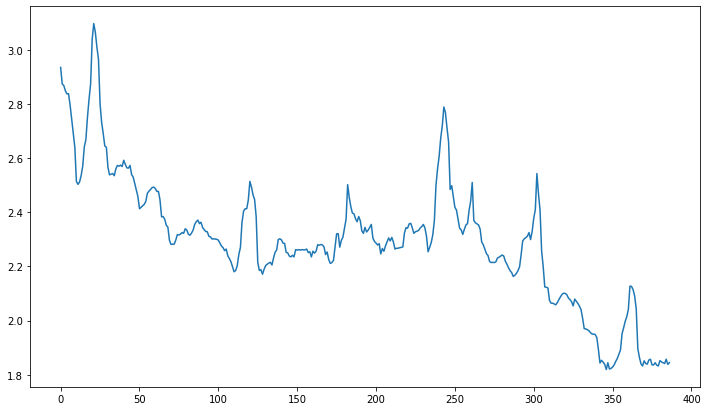

In [26]:
dst['七日年化'].plot(figsize=(12,7))

In [11]:
data = w.wsd("000059.OF", "fund_fundscale,prt_netasset,prt_stocktonav_passiveinvest,prt_stocktonav_activeinvest,prt_bondtonav,prt_fundtonav,prt_warranttonav,prt_cashtonav,prt_othertonav,pre_close,adjfactor", "2021-01-10", "2022-08-08", "unit=1")

In [12]:
pd.DataFrame(data.Data)

,0,1,2,3,4,5,6,7,8,9,...,372,373,374,375,376,377,378,379,380,381
0,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,...,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3,191287142.3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data2 = w.wss("000001.OF,000003.OF,000004.OF,000005.OF,000006.OF,000008.OF,000009.OF,000010.OF,000011.OF,000013.OF,000014.OF,000015.OF,000016.OF,000017.OF,000020.OF,000021.OF,000024.OF,000025.OF,000028.OF,000029.OF,000030.OF,000031.OF,000032.OF,000033.OF,000037.OF,000039.OF,000041.OF,000042.OF", "close,nav,NAV_adj_chg,peer_fund_return_rank_prop_per,NAV_return","tradeDate=20220808;priceAdj=U;cycle=D;startDate=20220709;endDate=20220809;fundType=1;rptDate=20211231;netType=1")

In [20]:
pd.DataFrame(data2.Data)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.097000,0.886000,0.877000,1.041200,2.150700,1.780600,1.000000,1.000000,17.569000,1.000000,...,1.152800,3.321000,1.383900,3.361000,1.117600,1.115400,1.072100,3.904600,0.934000,1.830500
2,0.071058,0.010582,0.009406,0.014696,0.039287,-0.015876,0.001817,0.002140,-1.617989,0.002154,...,-0.007135,0.040487,-0.072941,-0.092000,0.014657,0.013646,0.012804,-0.221800,0.017000,-0.137736
3,16.154957,15.778238,18.697809,17.812520,10.573240,61.461669,47.083569,45.011615,81.358699,44.936272,...,57.305205,14.936900,73.880831,73.340868,17.630439,18.666416,13.392353,87.185283,9.769574,85.942111
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ak.fund_open_fund_daily_em()

,基金代码,基金简称,2022-08-01-单位净值,2022-08-01-累计净值,2022-07-29-单位净值,2022-07-29-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费
0,006025,诺安优化配置混合,1.5068,1.5068,1.4473,1.4473,0.0595,4.11,开放申购,开放赎回,0.15%
1,016019,招商中证电池主题ETF联接A,1.0103,1.0103,0.9734,0.9734,0.0369,3.79,开放申购,开放赎回,0.12%
2,016020,招商中证电池主题ETF联接C,1.0099,1.0099,0.9730,0.9730,0.0369,3.79,开放申购,开放赎回,0.00%
3,001307,中欧永裕混合C,1.5640,1.5640,1.5070,1.5070,0.0570,3.78,开放申购,开放赎回,0.00%
4,001888,中欧盛世成长混合(LOF)E,2.3370,3.5660,2.2524,3.4814,0.0846,3.76,开放申购,开放赎回,0.15%
...,...,...,...,...,...,...,...,...,...,...,...
14722,016154,中银慧泽稳健3个月持有混合发起(FOF)C,,,,,,,开放申购,开放赎回,0.00%
14723,016217,中银证券慧泽平衡3个月持有混合发起(FOF)A,,,,,,,开放申购,暂停赎回,0.10%
14724,016139,中银证券慧泽进取3个月持有期混合发起(FOF)C,,,,,,,开放申购,暂停赎回,0.00%
14725,016343,招商中证银行指数E,,,,,,,开放申购,开放赎回,0.00%


In [20]:
res = ak.amac_person_fund_org_list()
res

,序号,机构名称,机构类型,员工人数,基金从业资格,基金销售业务资格,基金经理,投资经理
0,1,安信基金管理有限责任公司,公募基金管理公司,216,213,0,18,30
1,2,百嘉基金管理有限公司,公募基金管理公司,32,32,0,2,3
2,3,宝盈基金管理有限公司,公募基金管理公司,156,155,0,8,14
3,4,贝莱德基金管理有限公司,公募基金管理公司,88,84,0,3,5
4,5,北信瑞丰基金管理有限公司,公募基金管理公司,88,85,0,5,11
...,...,...,...,...,...,...,...,...
135,136,中信保诚基金管理有限公司,公募基金管理公司,200,198,0,11,26
136,137,中信建投基金管理有限公司,公募基金管理公司,175,165,0,8,15
137,138,中银基金管理有限公司,公募基金管理公司,376,364,0,13,41
138,139,中邮创业基金管理股份有限公司,公募基金管理公司,194,192,0,5,20


In [36]:
res = ak.fund_etf_category_sina()
res

,代码,名称,最新价,涨跌额,涨跌幅,买入,卖出,昨收,今开,最高,最低,成交量,成交额
0,sz169201,浙商鼎盈LOF,1.852,0.120,6.928,1.723,1.849,1.732,1.732,1.852,1.721,77713,134503
1,sz169107,东方红恒阳定开,1.093,0.005,0.460,1.091,1.093,1.088,1.081,1.093,1.081,119935,130883
2,sz169106,东方红创优定开,0.963,-0.001,-0.104,0.963,0.965,0.964,0.964,0.964,0.960,60765,58565
3,sz169105,东方红睿华LOF,1.557,-0.005,-0.320,1.558,1.572,1.562,1.573,1.573,1.556,34700,53998
4,sz169104,东方红睿满LOF,2.025,0.019,0.947,2.000,2.025,2.006,2.006,2.048,1.986,28800,58252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,sh501008,互联网医疗LOFC,0.953,0.000,0.000,0.946,0.962,0.953,0.953,0.953,0.953,100,95
371,sh501007,互联网医疗LOF,0.967,0.000,0.000,0.900,0.972,0.967,0.966,0.968,0.966,13300,12867
372,sh501005,精准医疗LOF,1.125,-0.004,-0.354,1.120,1.128,1.129,1.124,1.129,1.110,274962,308207
373,sh501001,财通精选混合LOF,2.164,0.002,0.093,0.000,2.190,2.162,2.160,2.190,2.160,6200,13450


In [43]:
res[res['代码'] == 'sz169104']

,代码,名称,最新价,涨跌额,涨跌幅,买入,卖出,昨收,今开,最高,最低,成交量,成交额
4,sz169104,东方红睿满LOF,2.025,0.019,0.947,2.0,2.025,2.006,2.006,2.048,1.986,28800,58252


In [22]:
ak.fund_cf_em()

100%|██████████| 40/40 [00:16<00:00,  2.48it/s]


,序号,基金代码,基金简称,拆分折算日,拆分类型,拆分折算
0,1,159845,华夏中证1000ETF,2022-08-01,份额折算,0.352276
1,2,000246,博时月月薪定期支付债券,2022-08-01,份额折算,NaN
2,3,510170,国联安上证商品ETF,2022-07-08,份额分拆,4.000000
3,4,000277,博时双月薪定期支付债券,2022-07-05,份额折算,1.008104
4,5,159941,广发纳斯达克100ETF,2022-07-04,份额分拆,4.000000
...,...,...,...,...,...,...
3980,3981,500028,基金兴业,2006-09-29,份额折算,1.160000
3981,3982,100020,富国天益价值混合,2006-07-17,份额折算,1.606483
3982,3983,510180,华安上证180ETF,2006-05-10,份额折算,0.372683
3983,3984,159901,易方达深证100ETF,2006-04-14,份额折算,0.949483


In [23]:
ak.fund_name_em()

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-灵活,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-灵活,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-长债,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
...,...,...,...,...,...
16744,970178,NJZQSZTTLHB,南京证券神州天添利货币,货币型,NANJINGZHENGQUANSHENZHOUTIANTIANLIHUOBI
16745,970180,ZJCFJJLHB,中金财富聚金利货币,货币型,ZHONGJINCAIFUJUJINLIHUOBI
16746,970182,ZSZGZCXZDZZQC,招商资管招朝鑫中短债债券C,债券型-混合债,ZHAOSHANGZIGUANZHAOCHAOXINZHONGDUANZHAIZHAIQUANC
16747,970193,ZJFYWJYNCYHHC,中金丰裕稳健一年持有混合C,混合型-偏债,ZHONGJINFENGYUWENJIANYINIANCHIYOUHUNHEC


In [41]:
ak.fund_etf_hist_sina("sz000011")

,date,open,high,low,close,volume
0,1992-03-30,10.00,11.95,10.00,11.00,461500
1,1992-03-31,11.15,11.15,10.30,11.00,640500
2,1992-04-01,11.00,11.50,10.60,11.40,474000
3,1992-04-02,11.25,11.70,11.00,11.55,514000
4,1992-04-03,11.50,11.70,11.20,11.50,489000
...,...,...,...,...,...,...
7161,2022-07-26,10.57,10.99,10.43,10.89,10508783
7162,2022-07-27,10.86,10.86,10.67,10.75,6470681
7163,2022-07-28,10.75,10.92,10.66,10.80,7054473
7164,2022-07-29,10.85,10.85,10.65,10.68,5060476


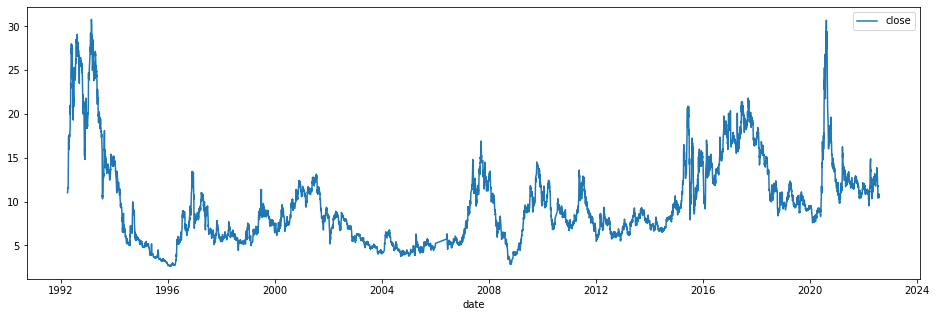

In [44]:
ak.fund_etf_hist_sina("sz000011")[['date','close']].set_index('date').plot(figsize=(16,5))

In [45]:
ak.fund_graded_fund_info_em("000011")

,净值日期,单位净值,累计净值,日增长率,申购状态,赎回状态
0,2022-08-01,17.9710,24.9780,0.51,限制大额申购,开放赎回
1,2022-07-29,17.8800,24.8870,-0.80,限制大额申购,开放赎回
2,2022-07-28,18.0240,25.0310,-0.08,限制大额申购,开放赎回
3,2022-07-27,18.0380,25.0450,-0.55,限制大额申购,开放赎回
4,2022-07-26,18.1380,25.1450,1.02,限制大额申购,开放赎回
...,...,...,...,...,...,...
4365,2004-09-03,0.9970,0.9970,-0.30,封闭期,封闭期
4366,2004-08-27,1.0000,1.0000,-0.10,封闭期,封闭期
4367,2004-08-20,1.0010,1.0010,0.10,封闭期,封闭期
4368,2004-08-13,1.0000,1.0000,0.00,封闭期,封闭期


In [48]:
ak.fund_portfolio_change_em('000011',date= 2018)

,序号,股票代码,股票名称,本期累计买入金额,占期初基金资产净值比例,季度
0,1,300124,汇川技术,22169.26,7.24,2018年4季度累计买入股票明细
1,2,600029,南方航空,19164.26,6.26,2018年4季度累计买入股票明细
2,3,600176,中国巨石,18277.68,5.97,2018年4季度累计买入股票明细
3,4,600019,宝钢股份,17696.62,5.78,2018年4季度累计买入股票明细
4,5,600885,宏发股份,16914.28,5.52,2018年4季度累计买入股票明细
5,6,000089,深圳机场,16309.98,5.33,2018年4季度累计买入股票明细
6,7,002419,天虹股份,14261.19,4.66,2018年4季度累计买入股票明细
7,8,002032,苏泊尔,14184.52,4.63,2018年4季度累计买入股票明细
8,9,600525,长园集团,13899.36,4.54,2018年4季度累计买入股票明细
9,10,600309,万华化学,13514.92,4.41,2018年4季度累计买入股票明细


In [49]:
ak.fund_portfolio_change_em('000011',date= 2018)['占期初基金资产净值比例'].cumsum()

0       7.24
1      13.50
2      19.47
3      25.25
4      30.77
5      36.10
6      40.76
7      45.39
8      49.93
9      54.34
10     58.62
11     62.82
12     66.39
13     69.76
14     72.95
15     76.08
16     79.00
17     81.91
18     84.77
19     87.58
20     90.28
21     92.92
22     95.56
23     98.19
24    100.48
25    102.76
26    105.04
27    107.21
28    109.23
29    114.51
30    119.05
31    123.33
32    127.61
33    131.81
34    136.00
35    139.59
36    143.05
37    146.13
38    148.90
39    151.60
40    154.24
41    156.58
42    158.86
43    161.07
44    163.27
45    165.42
46    167.44
47    169.39
48    171.17
Name: 占期初基金资产净值比例, dtype: float64

In [ ]:
ak.fund_portfolio_bond_hold_em()

In [ ]:
# 导入tushare